<a href="https://colab.research.google.com/github/cinth90/Datascience1/blob/main/Modelo_regresion_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Carga de datos: Acciones de Tesla

In [7]:
#descarga dato de Tesla (TSLA)
data =yf.download('TSLA', start='2020-01-01', end='2023-01-01')

#crear nuevas columnas para la regresion
data['Return'] = data['Close'].pct_change()
data['Volatility'] = data['Return'].rolling(window=21).std() #ventana movil 21 dias
data = data.dropna() #eliminaos datos nulos

data.head()

/tmp/ipython-input-3671636532.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data =yf.download('TSLA', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return,Volatility
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,
2020-02-03,52.000000,52.409332,44.901333,44.912666,705975000,0.198949,0.053324
2020-02-04,59.137333,64.599335,55.591999,58.863998,914082000,0.137256,0.058234
2020-02-05,48.980000,56.398666,46.940666,54.883999,726357000,-0.171758,0.073699
2020-02-06,49.930668,53.055332,45.799999,46.661331,598212000,0.019409,0.073652
2020-02-07,49.871334,51.316666,48.666668,48.703335,255952500,-0.001188,0.073648


#Visualizacion de datos: REtorno y Volatilidad

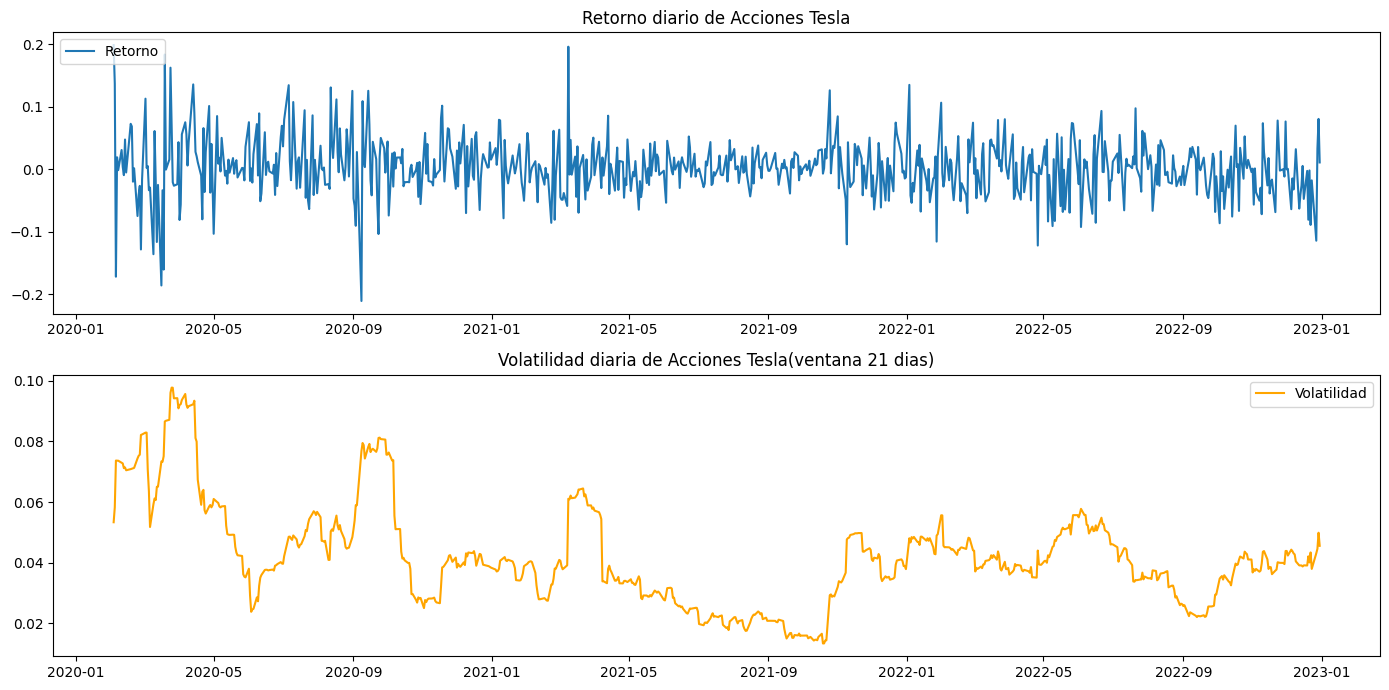

In [8]:
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['Return'], label='Retorno')
plt.legend(loc='upper left')
plt.title('Retorno diario de Acciones Tesla')

plt.subplot(2,1,2)
plt.plot(data['Volatility'], label='Volatilidad', color = 'orange')
plt.legend()
plt.title('Volatilidad diaria de Acciones Tesla(ventana 21 dias)')

plt.tight_layout()
plt.show()

#Conjunto de entrenamiento y prueba

In [9]:
x = data[['Return']]
y = data['Volatility']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Entrenamiento del modelo

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#Prediccion de volatilidad

In [11]:
y_pred = model.predict(x_test)

#Evaluacion de rendimiento del modelo

In [12]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  0.00028564336503966714
R2 Score:  -0.0029270866515715976


#Visualizacon de predicciones

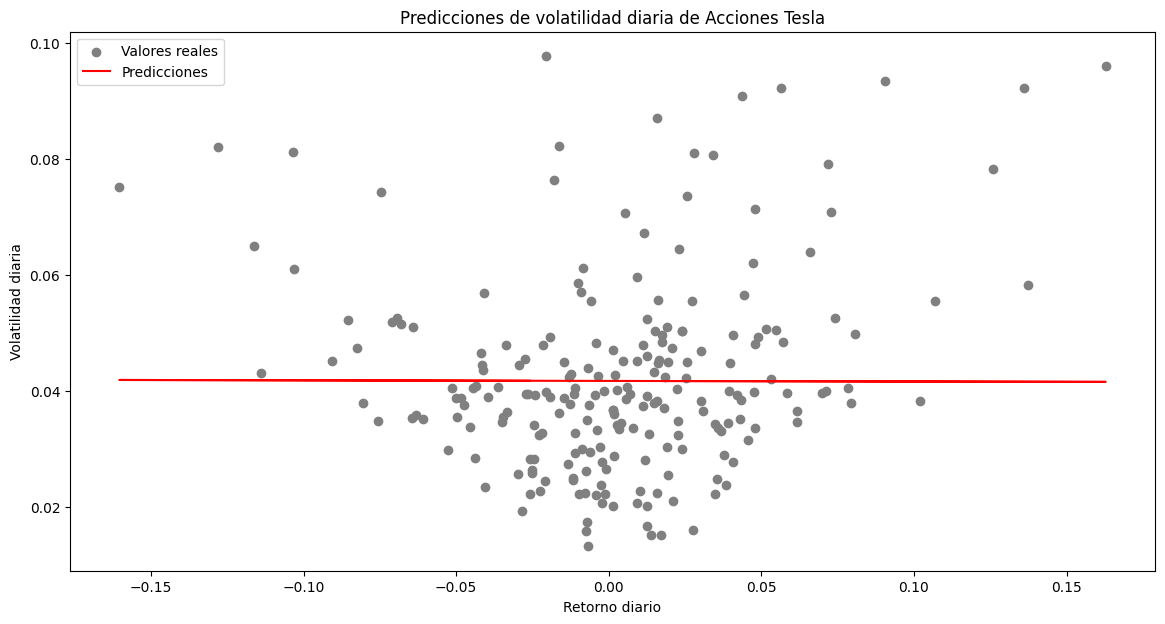

In [13]:
plt.figure(figsize=(14,7))
plt.scatter(x_test, y_test, color='grey', label='Valores reales')
plt.plot(x_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Retorno diario')
plt.ylabel('Volatilidad diaria')
plt.title('Predicciones de volatilidad diaria de Acciones Tesla')
plt.legend()
plt.show()
